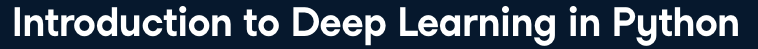

# Basics of Deep Learning & Neural Networks

- ### Become familiar with the fundamental concepts and terminology used in deep learning

### Introduction to Deep Learning

Imagine you work for a bank, and you need to build a model predicting how many transactions each customer will make next year. You have predictive data or features like each customer’s age, bank balance, whether they are retired and so on. We'll get to deep learning in a moment, but for comparison, consider how a simple linear regression model works for this problem. The linear regression embeds an assumption that the outcome, in this case how many transactions a user makes, is the sum of individual parts. It starts by saying, "what is the average?" Then it adds the effect of age. Then the effect of bank balance. And so on. So **the linear regression model isn't identifying the interactions between these parts**, and how they affect banking activity.
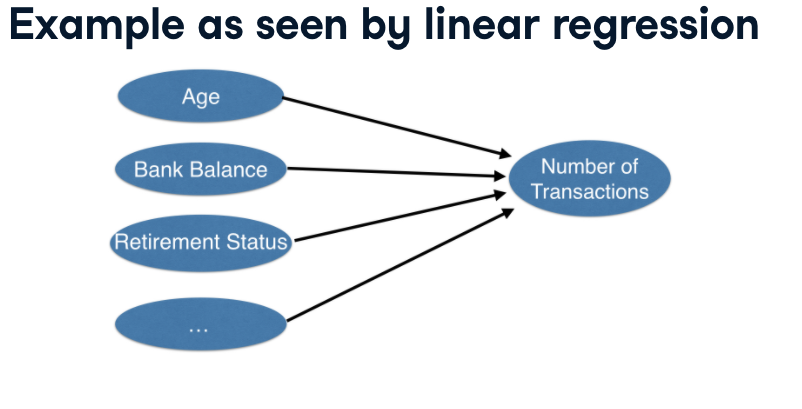

Say we plot predictions from this model. We draw one line with the predictions for retired people, and another with the predictions for those still working. We put current bank balance on the horizontal axis, and the vertical axis is the predicted number of transactions.

The left graph shows predictions from a model with no interactions. In that model we simply add up the effect of the retirement status, and current bank balance. The lack of interactions is reflected by both lines being parallel. That's probably unrealistic, but it's an assumption of the linear regression model.

The graph on the right shows the predictions from a model that allows interactions, and the lines don't need to be parallel. 

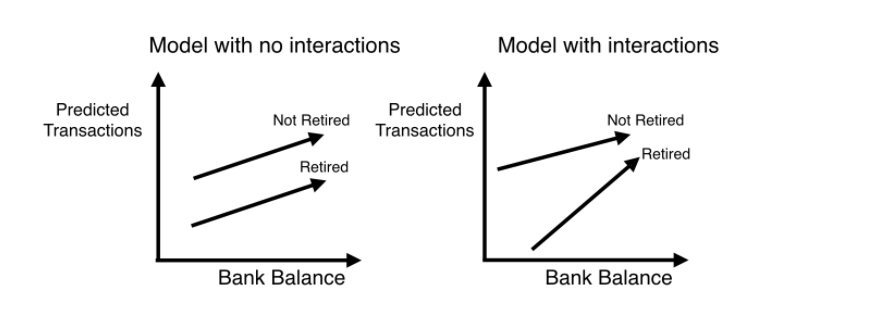

**Interactions.** Neural networks are a powerful modeling approach that accounts for interactions like this especially well. Deep learning, the focus of this course, is the use of especially powerful neural networks. Because deep learning models account for these types of interactions so well, they perform great on most prediction problems you've seen before. But their ability to capture extremely complex interactions also allow them to do amazing things with text, images, videos, audio, source code and almost anything else you could imagine doing data science with.
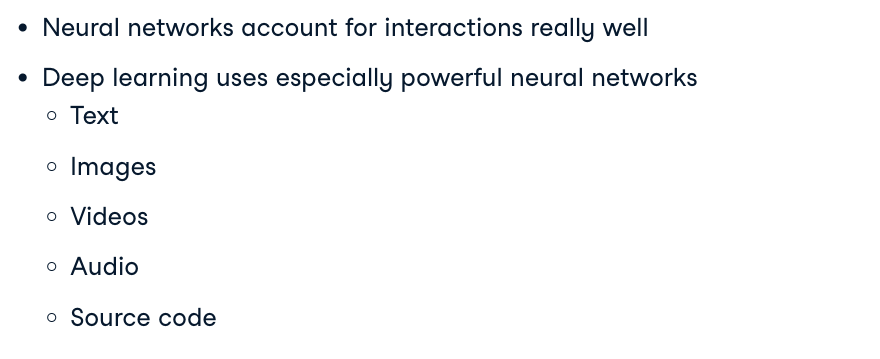

**Structure** The first two sections focus on conceptual knowledge about deep learning. This part will be hard, but it will prepare you to debug and tune deep learning models on conventional prediction problems, and it will lay the foundation for progressing towards those new and exciting applications. You'll see this pay off in the third and fourth chapter.
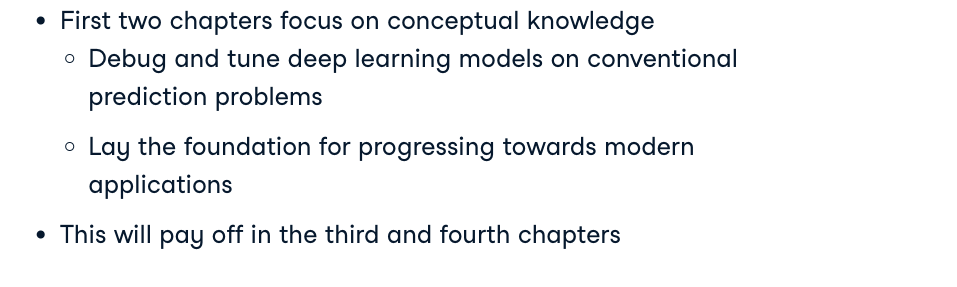

You will write code that looks like this, to build and tune deep learning models using keras, to solve many of the same modeling problems you might have previously solved with scikit-learn. As a start to how deep learning models capture interactions and achieve these amazing results, we'll modify the diagram you saw a moment ago.
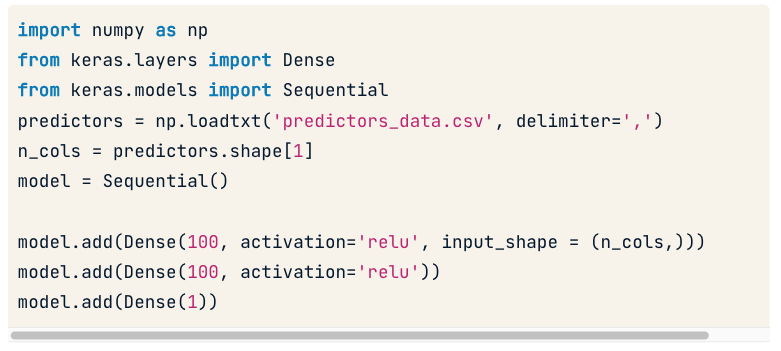

Here there is an interaction between retirement status and bank balance. Instead of having them separately affect the outcome, we calculate a function of these variables that accounts for their interaction, and use that to predict the outcome. Even this graphic oversimplifies reality, where most things interact with each in some way, and real neural network models account for far more interactions. 
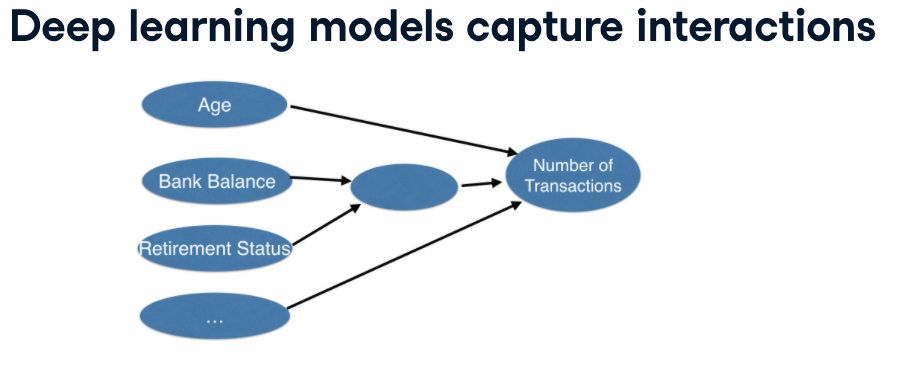

So the diagram for a simple neural network looks like this. On the far left, we have something called an input layer. This represents our predictive features like age or income. On the far right we have the output layer. The prediction from our model, in this case, the predicted number of transactions. 
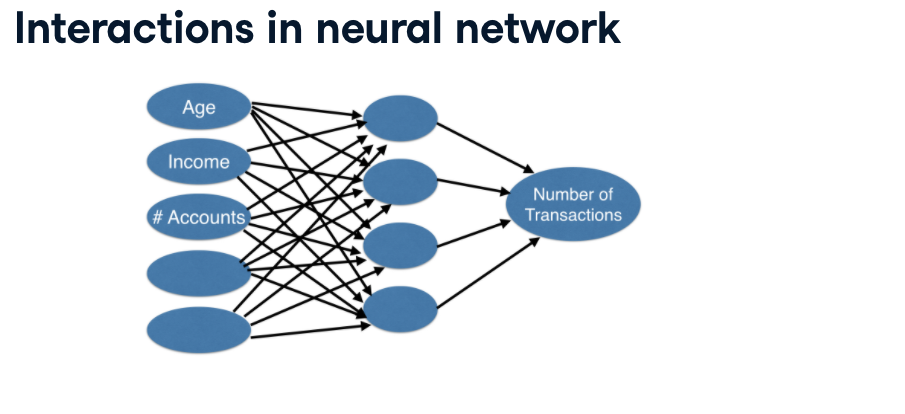




All layers that are not the input or output layers are called hidden layers. They are called hidden layers because, while the inputs and outputs correspond to visible things that happened in the world, and they can be stored as data, the values in the hidden layer aren't something we have data about, or anything we observe directly from the world. Nevertheless, each dot, called a node, in the hidden layer, represents an aggregation of information from our input data, and each node adds to the model's ability to capture interactions. So the more nodes we have, the more interactions we can capture. 

### Forward Propagation

We’ll start by showing how neural networks use data to make predictions. This is called the forward propagation algorithm. Let's revisit our example predicting how many transactions a user will make at our bank. For simplicity, we'll make predictions based on only the number of children and number of existing accounts.

**make predictions based on:**
- the number of children
- number of existing accounts

**Forward propagation**
This graph shows a customer with two children and three accounts. The forward-propagation algorithm will pass this information through the network to make a prediction in the output layer. Lines connect the inputs to the hidden layer. Each line has a weight indicating how strongly that input effects the hidden node that the line ends at. These are the first set of weights. We have one weight from the top input into the top node of the layer, and one weight from the bottom input to the top node of the hidden layer. These weights are the parameters we train or change when we fit a neural network to data, so these weights will be a focus throughout this course. To make predictions for the top node of the hidden layer, we take the value of each node in the input layer, multiply it by the weight that ends at that node, and then sum up all the values. In this case, we get (2 times 1) plus (3 times 1), which is 5.Now do the same to fill in the value of this node on the bottom. That is (two times (minus one)) plus (three times one). That's one. Finally, repeat this process for the next layer, which is the output layer. That is (five times two) plus (one times -1). That gives an output of 9. We predicted nine transactions. That’s forward-propagation.
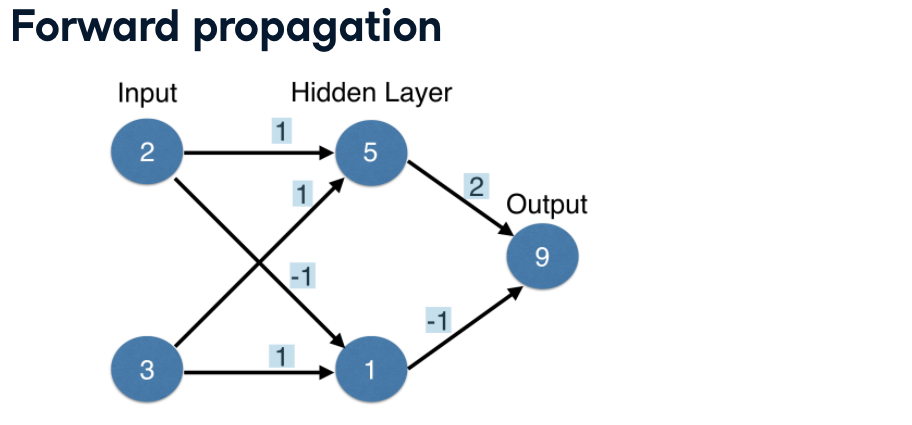

We moved from the inputs on the left, to the hidden layer in the middle, and then from the hidden layers to the output on the right. We always use that same multiply then add process. If you're familiar with vector algebra or linear algebra, that operation is a dot product. If you don't know about dot products, that's fine too. That was forward propagation for a single data point. In general, we do forward propagation for one data point at a time. The value in that last layer is the model's prediction for that data point.
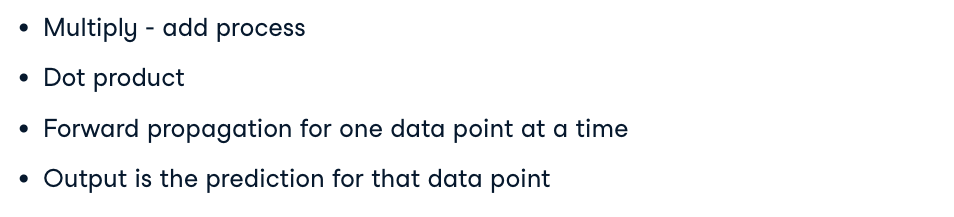

**Forward propagation code**
Let's see the code for this. We import Numpy for some of the mathematical operations. We've stored the input data as an array. We then have weights into each node in the hidden layer and to the output. We store the weights going into each node as an array, and we use a dictionary to store those arrays. Let’s start forward propagating. We fill in the top hidden node here, which is called node zero. We multiply the inputs by the weights for that node, and then sum both of those terms together. Notice that we had two weights for node_0. That matches the two items in the array it is multiplied by, which is the input_data. These get converted to a single number by the sum function at the end of the line. We then do the same thing for the bottom node of the hidden layer, which is called node 1.Now, both node zero and node one have numeric values.
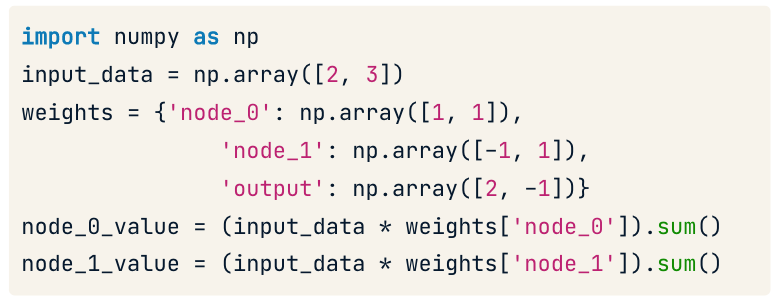

To simplify multiplication, we put those in an array here. If we print out the array, we confirm that those are the values from the hidden layer you saw a moment ago. It can also be instructive to verify this by hand with pen and paper. To get the output, we multiply the values in the hidden layer by the weights for the output. Summing those together gives us 10 minus 1, which is 9.
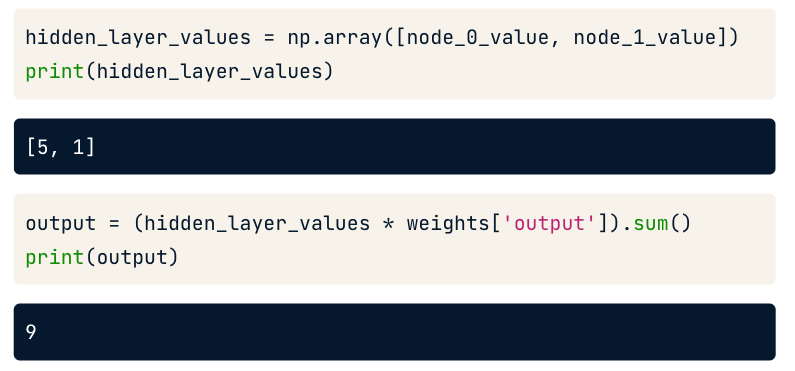

### Activation Functions


Creating this multiply-add-process is only half the story for hidden layers. For neural networks to achieve their maximum predictive power, we must apply something called an activation function in the hidden layers.

**Linear vs Nonlinear Functions**
An activation function allows the model to capture non-linearities. Non-linearities, as shown on the right here, capture patterns like how going from no children to one child may impact your banking transactions differently than going from three children to four. We have examples of linear functions, straight lines on the left, and non-linear functions on the right. If the relationships in the data aren’t straight-line relationships, we will need an activation function that captures non-linearities.
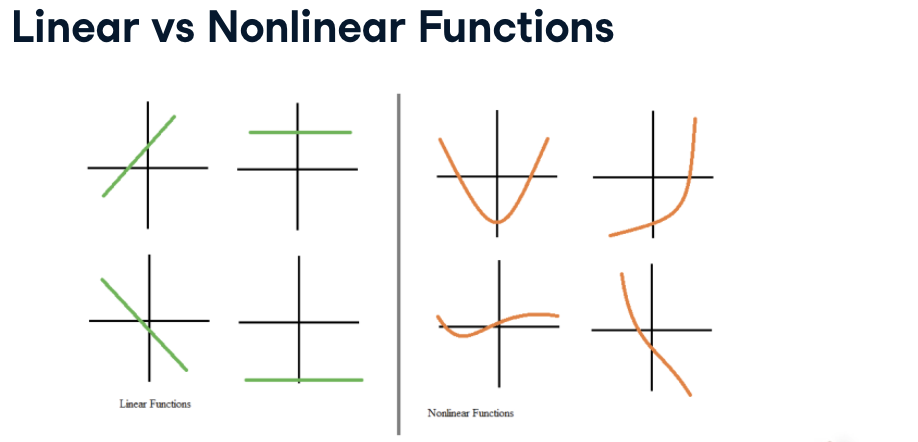

An activation function is something applied to the value coming into a node, which then transforms it into the value stored in that node, or the node output.

**- Activation Function: Applied to node inputs to produce node outputs**

**Improving our neural network** Let's go back to the previous diagram. The top hidden node previously had a value of 5. For a long time, an s-shaped function called tanh was a popular activation function.
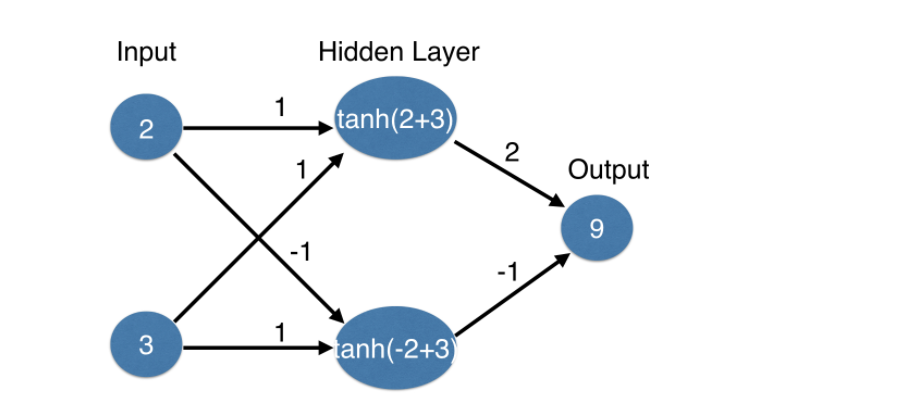

If we used the tanh activation function, this node's value would be tanh(5), which is very close to 1.

**ReLU (Rectified Linear Activation)** Today, the standard in both industry and research applications is something calledthe ReLU or rectified linear activation function. That's depicted here. Though it has two linear pieces, it's surprisingly powerful when composed together through multiple successive hidden layers, which you will see soon. 
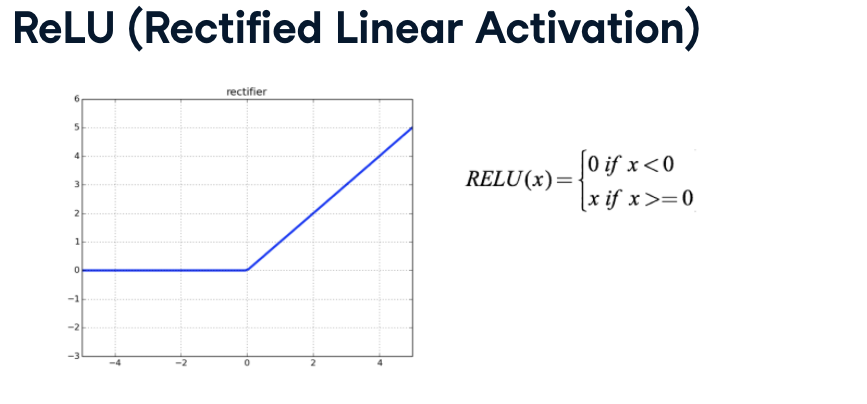

The code that incorporates activation functions is shown here.  It is the same as the code you saw previously, but we've distinguished the input from the output in each node, which is shown in these lines and then again here And we've applied the tanh function to convert the input to the output. That gives us a prediction of 1-point-2 transactions.
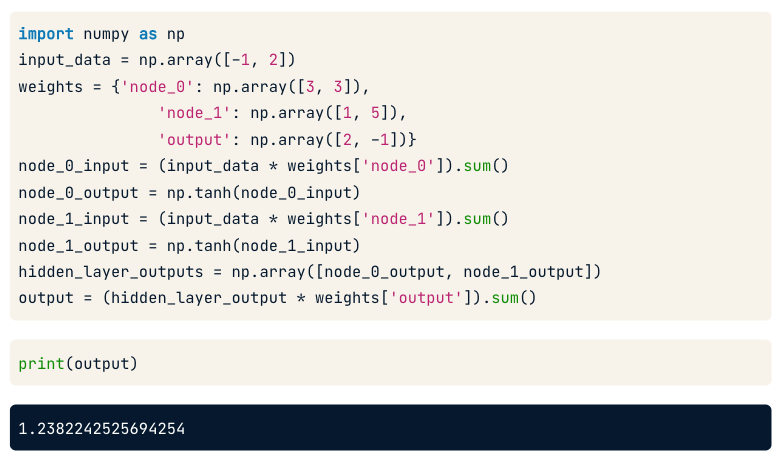

### Deeper Networks

The difference between modern deep learning and the historical neural networks that didn’t deliver these amazing results, is the use of models with not just one hidden layer, but with many successive hidden layers. We forward propagate through these successive layers in a similar way to what you saw for a single hidden layer.

Here is a network with two hidden layers. We first fill in the values for hidden layer one as a function of the inputs. Then apply the activation function to fill in the values in these nodes. Then use values from the first hidden layer to fill in the second hidden layer. Then we make a prediction based on the outputs of hidden layer two. In practice, it's becoming common to have neural networks that have many, many layers; five layers, ten layers. A few years ago 15 layers was state of the art but this can scale quite naturally to even a thousand layers.
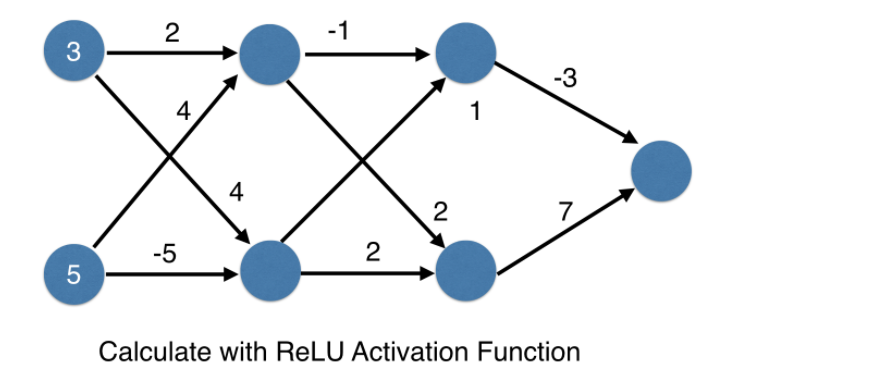

You use the same forward propagation process, but you apply that iterative process more times. Let's walk through the first steps of that. Assume all layers here use the ReLU activation function. We'll start by filling in the top node of the first hidden layer. That will use these two weights. The top weights contributes 3 times 2, or 6. The bottom weight contributes 20. The ReLU activation function on a positive number just returns that number. So we get 26.Now let's do the bottom node of that first hidden layer. We use these two nodes. Using the same process, we get 4 times 3, or 12 from this weight. And -25 from the bottom weight. So the input to this node is 12 minus 25. Recall that, when we apply ReLU to a negative number, we get 0. So this node is 0.We've shown the values for the subsequent layers here.
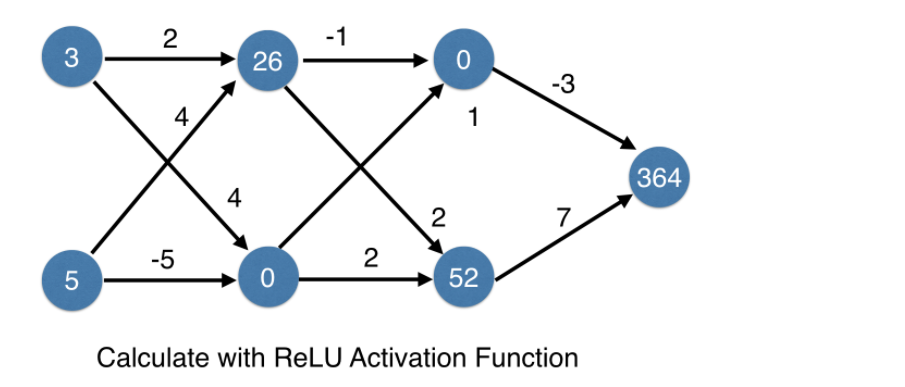

Pause this video, and verify you can calculate the same values at each node. At this point, you understand the mechanics for how neural networks make predictions. 

**Representation learning**
Let’s close this section with an interesting and important fact about these deep networks. That is, they internally build up representations of the patterns in the data that are useful for making predictions. And they find increasingly complex patterns as we go through successive hidden layers of the network. In this way, neural networks partially replace the need for feature engineering, or manually creating better predictive features. Deep learning is also sometimes called representation learning, because subsequent layers build increasingly sophisticated representations of the raw data, until we get to a stage where we can make predictions. This is easiest to understand from an application to images, which you will see later in this course. 

- internally build up representations of the patterns in the data
- partially replace the need for feature engineering
- subsequent layers build increasingly sophisticated representations of the raw data

Even if you haven't worked with images, you may find it useful to think through this example heuristically. 
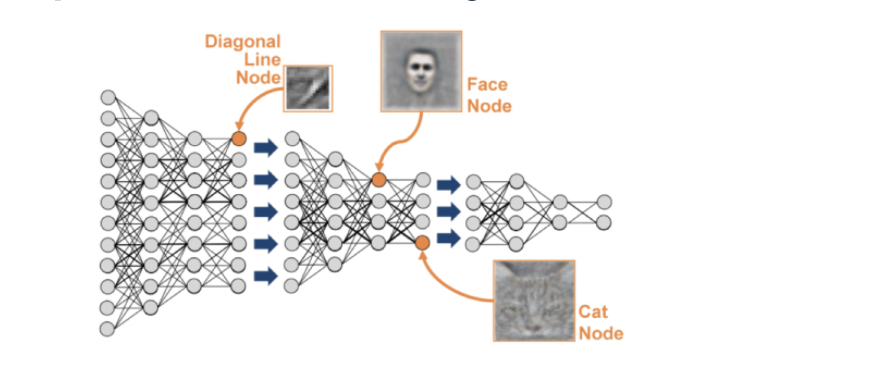

When a neural network tries to classify an image, the first hidden layers build up patterns or interactions that are conceptually simple. A simple interaction would look at groups of nearby pixels and find patterns like diagonal lines, horizontal lines, vertical lines, blurry areas, etc. Once the network has identified where there are diagonal lines and horizontal lines and vertical lines, subsequent layers combine that information to find larger patterns, like big squares. A later layer might put together the location of squares and other geometric shapes to identify a checkerboard pattern, a face, a car, or whatever is in the image. 

The cool thing about deep learning is that the modeler doesn’t need to specify those interactions. We never tell the model to look for diagonal lines. Instead, when you train the model, which you’ll learn to do in the next chapter, the network gets weights that find the relevant patterns to make better predictions. Working with images may still seem abstract, but this idea of finding increasingly complex or abstract patterns is a recurring theme when people talk about deep learning, and it will feel more concrete as you work with these networks more.
- modeler doesn’t need to specify those interactions
- the network gets weights that find the relevant patterns to make better predictions


# Optimizing a Neural Network with Backward Propagation

- ### optimize the predictions generated by your neural networks
- ### use a method called backward propagation
    - one of the most important techniques in deep learning
    - understanding how it works will give you a strong foundation to build on
    
### The Need for Optimization

You've seen the forward-propagation algorithm that neural networks use to make predictions. However, the mere fact that a model has the structure of a neural network does not guarantee that it will make good predictions. 

**A baseline neural network**
To see the importance of model weights, we'll go back to a network you saw in the previous chapter. We'll use a simple example for the sake of explanation. For the moment, we won't use an activation function in this example, or if you prefer, you might think of an activation function that returns the input, sometimes called the identity function. We have values of 2 and 3 for the inputs, and the true value of the target is 13. So, the closer our prediction is to 13, the more accurate this model is for this data point. We use forward propagation to fill in the values of hidden layer. That gives us hidden node values of 5 and 1. Continuing forward propagation, we use those hidden node values to make a prediction of 9. Since the true target value is 13, our error is 13 minus 9, which is 4.
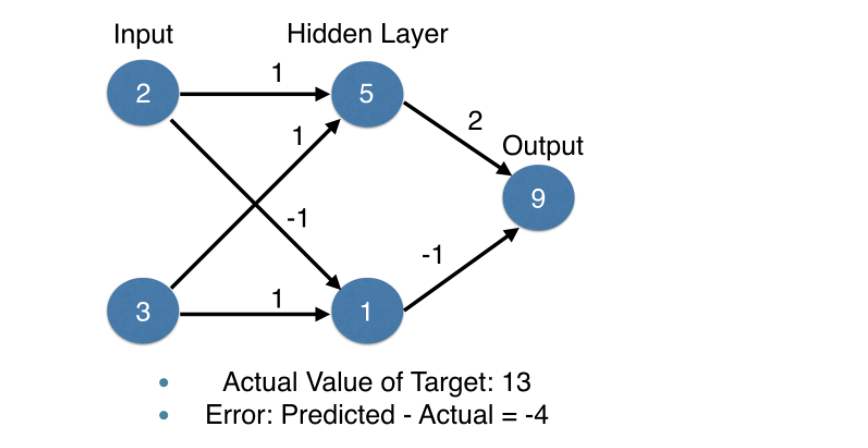

Changing any weight will change our prediction. Let’s see what happens if we change the two weights from the hidden layer to the output. In this case, we make the top weight 3 and the bottom weight -2. Now forward propagation gives us a prediction of 13. That is exactly the value we wanted to predict. So, this change in weights improved the model for this data point.
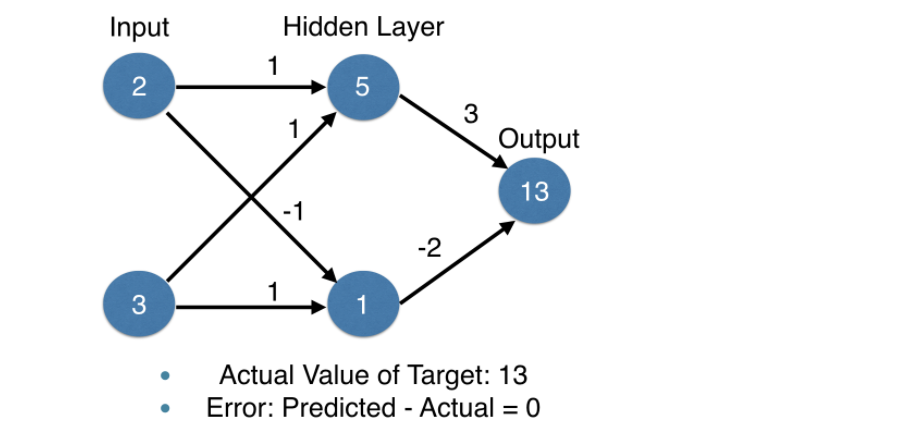

**Predictions with multiple points**
Making accurate predictions gets harder with multiple points. First of all, at any set of weights, we have many values of the error, corresponding to the many points we make predictions for. We use something called a **loss function** to aggregate all the errors into a single measure of the model's predictive performance. 
- Making accurate predictions gets harder with multiple points
- loss function: aggregate all the errors into a single measure of the model's performance


**Squared error loss function** For example, a common loss function for regression tasks is mean-squared error. You square each error, and take the average of that as a measure of model quality. The loss function aggregates all of the errors into a single score. 
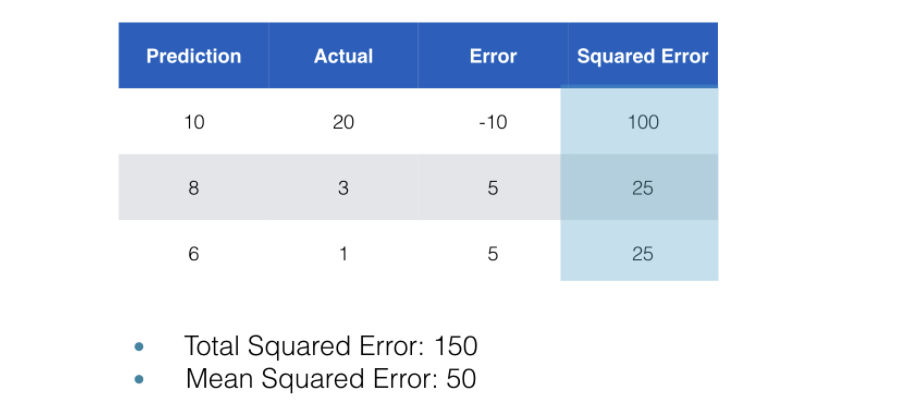

For an illustration, consider a model with only two weights, we could plot the model's performance for each set of weights like this. The values of the weights are plotted on the x and y axis, and the loss function is on the vertical or z axis. Lower values mean a better model, so our goal is to find the weights giving the lowest value for the loss function. We do this with an algorithm called gradient descent. An analogy may be helpful.
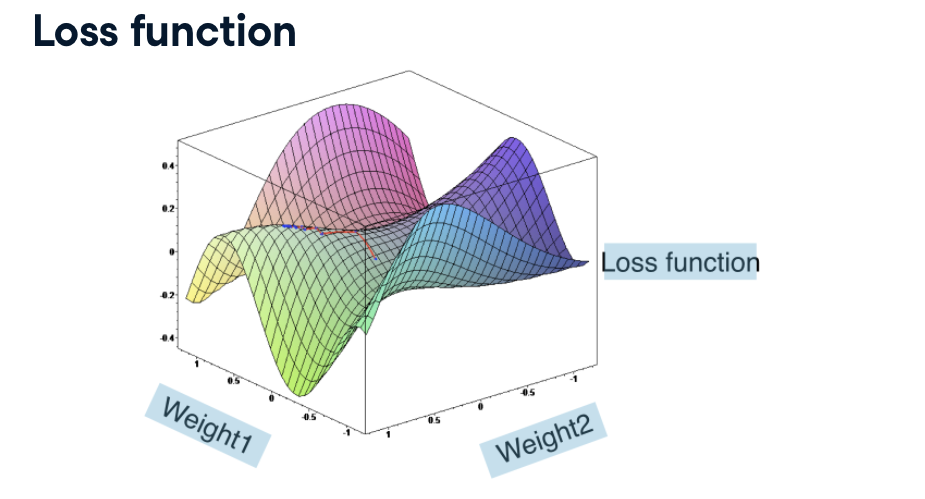

### Gradient Descent

Imagine you are in a pitch dark field, and you want to find the lowest point. You might feel the ground to see how it slopes, and take a small step downhill. This gives an improvement, but not necessarily the lowest point yet. So you repeat this process until it is uphill in every direction. This is roughly how gradient descent works.
- Imagine you are in a pitch dark field
- you want to find the lowest point
- feel the ground to see how it slopes
- take a small step downhill
- repeat this process until it is uphill in every direction

**Gradient descent steps** The steps are: Start at a random point, until you are somewhere flat, find the slope, and take a step downhill. 

**Optimizing a model with a single weight**
Let's look at optimizing a model with a single weight, and then we'll scale up to optimizing multiple weights. We have a curve showing the loss function on the vertical axis, at different values of the weight, which is on the horizontal axis. We are looking for the low point on this curve, because that means our model is as accurate as possible. We have drawn this tangent line to the curve at our current point. The slope of that tangent line captures the slope of the loss function at the our current weight. That slope corresponds to something called the derivative from calculus. We use this slope to decide what direction we step. In this case, the slope is positive. So if we want to go downhill, we go in the direction opposite the slope, towards lower numbers. If we repeatedly take small steps opposite the slope, recalculating the slope each time, we will eventually get to the minimum value. You will see more detail in the next section.
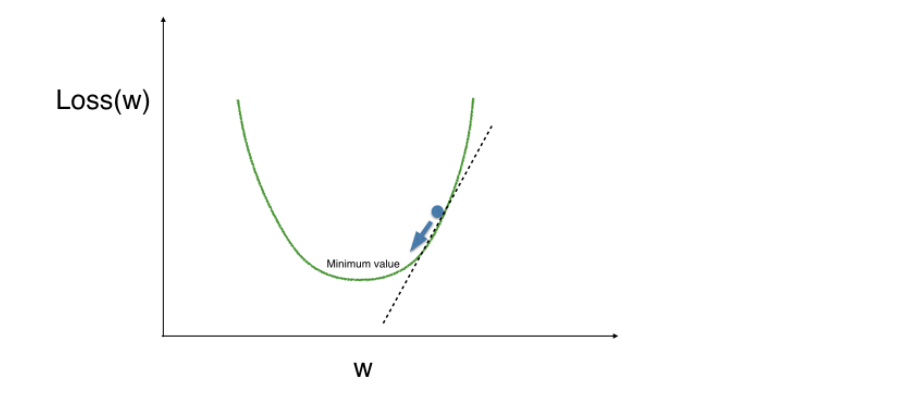

**With gradient descent, you repeatedly find a slope capturing how your loss function changes as a weight changes. You make a small change to the weight to get to a lower point, and you repeat this until you can't go downhill any more.**
 
If the slope is positive, going opposite the slope means moving to lower numbers. Subtracting the slope from the current value achieves this. But too big a step might lead us far astray. So, instead of directly subtracting the slope, we multiply the slope by a small number, called the learning rate, and we change the weight by the product of that multiplication. Learning rate are frequently around 0.01: this ensures we take small steps, so we reliably move towards the optimal weights. 
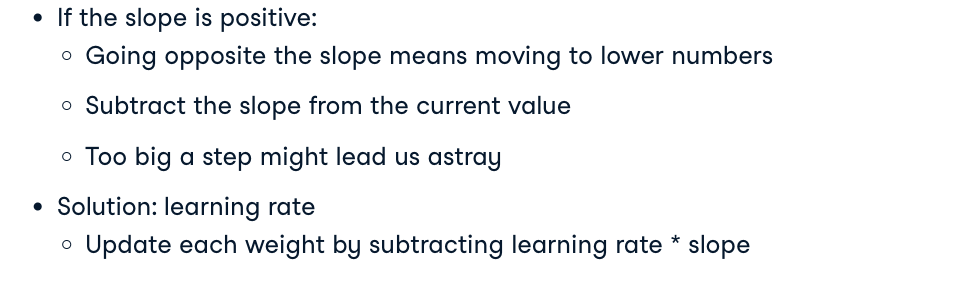

**How do we find the relevant slope for each weight we need to update?** Working this out for yourself involves calculus, especially the application of the chain rule. Don't worry if you don't remember or don't know the underlying calculus. We'll explain some basic concepts here, and Keras and TensorFlow do the calculus for us.

**Slope calculation example** Here is a first example to calculate a slope for a weight, and in this example we will look at a single data point. Weights feed from one node into another, and you always get the slope you need by multiplying three things. First, the slope of the loss function with respect to the value at the node we feed into. Second, the value of the node that feeds into our weight. Third, the slope of the activation function with respect to the value we feed into. 
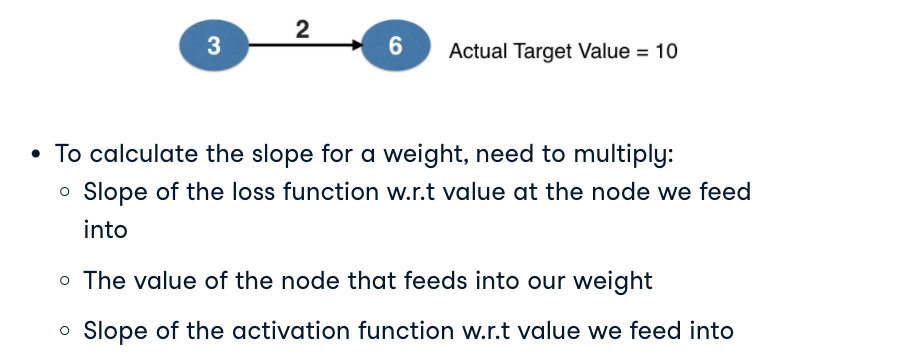

Let's start with the slope of the loss function with respect to the value of the node our weight feeds into. In this case, that node is the model's prediction. If you work through some calculus, you will find that the slope of the mean-squared loss function with respect to the prediction is 2 times (predicted value - actual value). Which is 2 times the error. Here, the prediction from forward propagation was 6. The actual target value is 10, so the error is 6 minus 10, which is -4. The second thing we multiply is the value at the node we are feeding from. Here, that is 3. Finally, the slope of the activation function at the value we feed into. Since we don't have an activation function here, we can leave that out. 
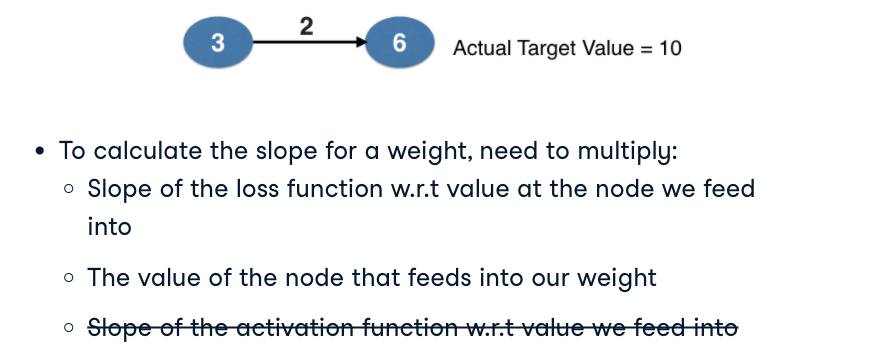

So our final result for the slope of the loss if we graphed it against this weight is 2 times -4 times 3, or negative 24.We improve this weight by taking the difference of the original weight (2) and the learning rate times times that slope, (-24). If the learning rate were 0.01, we would update this weight to be 2.24. This gives us a better model.
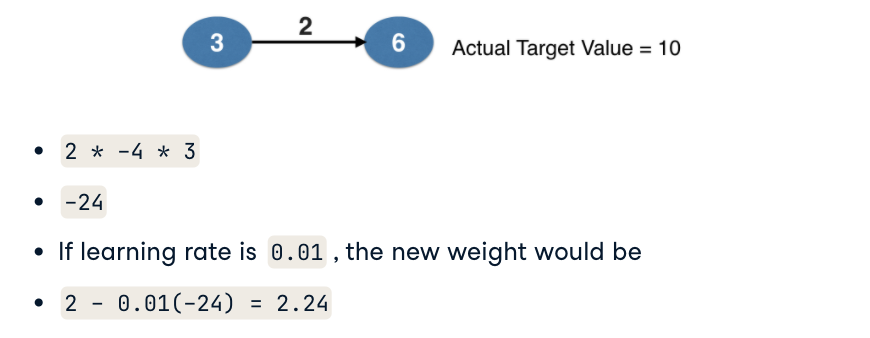

 And it would continue improving if we repeated this process. For multiple weights feeding to the output, we repeat this calculation separately for each weight. Then we update both weights simultaneously using their respective derivatives.

**Network with two inputs affecting prediction**
Here is a network with two weights going directly to an output, and again with no activation function.
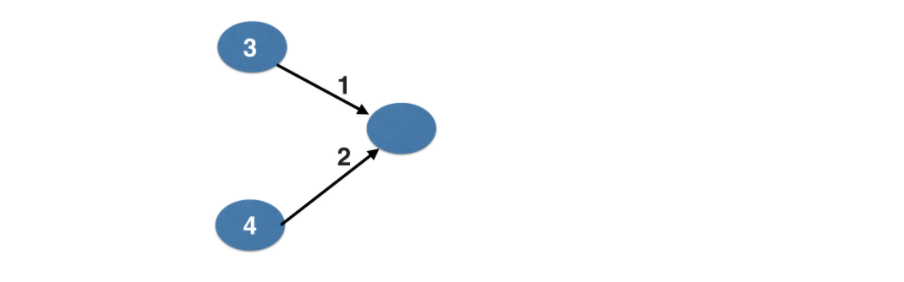

**Code to calculate slopes and update weights**
Let’s see the code to calculate slopes and update the weights. First, we set up the weights, input data, and a target value to predict.
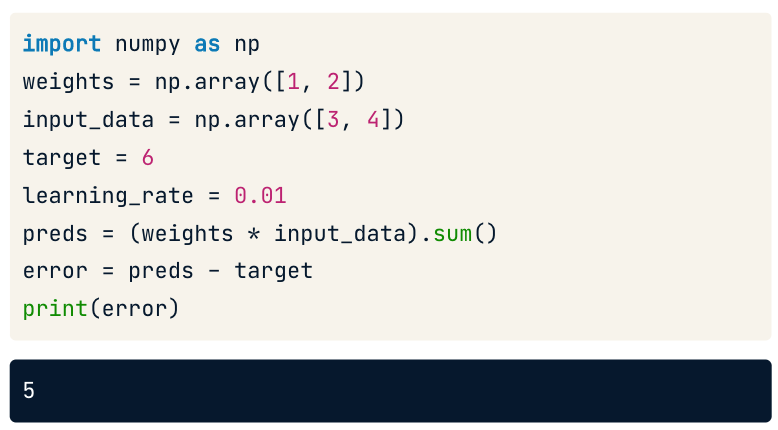

Here is the slope calculation. We uses numpy broadcasting, which multiplies an array by a number so that each entry in the array is multiplied by that number. We multiply two(2) times the error times the array with the input nodes. This gives us an array that used the 1st node value for the first calculated slope, and the second node value for the 2nd calculated slope. This is exactly what we wanted. Incidentally, **the mathematical term for this array of slopes is a "gradient", and this is where the name gradient descent comes from**. We update the weights by some small step in that direction, where the step size is partially determined by the learning rate. And the new error is 2.5, which is an improvement over the old error, which was 5. Repeating that process from the new values would give further improvements.
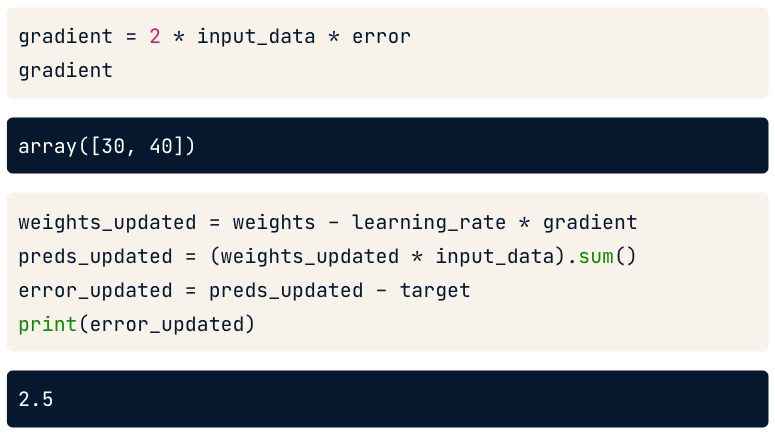

### Backpropagation
Now we'll add a technique called “back propagation” to calculate the slopes you need to optimize more complex deep learning models. Just as forward propagation sends input data through the hidden layers and into the output layer, back propagation takes the error from the output layer and propagates it backward through the hidden layers, towards the input layer. 
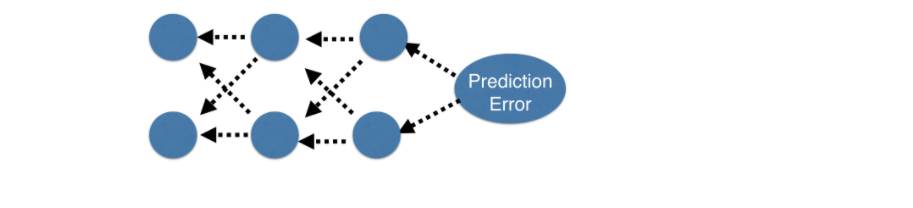

It calculates the necessary slopes sequentially from the weights closest to the prediction, through the hidden layers, eventually back to the weights coming from the inputs. We then use these slopes to update our weights as you've seen. Back propagation is tricky. 

**Focus on the general structure of the algorithm, rather than trying to memorize every step. In the big picture, we are trying to estimate the slope of the loss function with respect to each weight in our network.** 
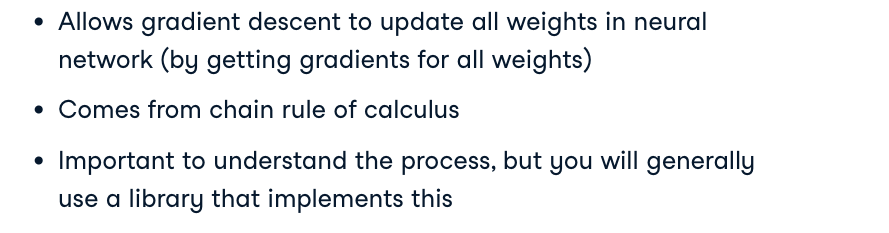

You've already seen that we use prediction errors to calculate some of those slopes. So we always do forward propagation to make a prediction and calculate an error before we do back propagation. For back-propagation, we go back one layer at a time, and each time we go back a layer, we'll use a formula for slopes that you saw in the last section. Every weight feeds from some input node into some output node. The three things we multiply to get the slope for that weight are:
- 1, the value at the weights input node.
- 2, the slope from plotting the loss function against that weight's output node.
- 3, the slope of the activation function at the weight's output. 

We know the value at the node feeding into this weight. Either it is in an input layer, in which case we have it from the data. Or that node is in a hidden layer, in which case we calculated its value when we did forward propagation. The second item on this list is the slope of the loss function with respect to the output node. We do backward propagation from the right side of our diagram to the left. So we already calculated that slope by the time we to plug it into the current calculation. Finally we need the slope of the activation function at the node it feeds into.

**ReLU Activation Function**
You can see from this diagram that, for the ReLU function, the slope is 0 if the input into a node is negative. If the input into the node is positive, the output is the same as the input. So the slope would be 1.
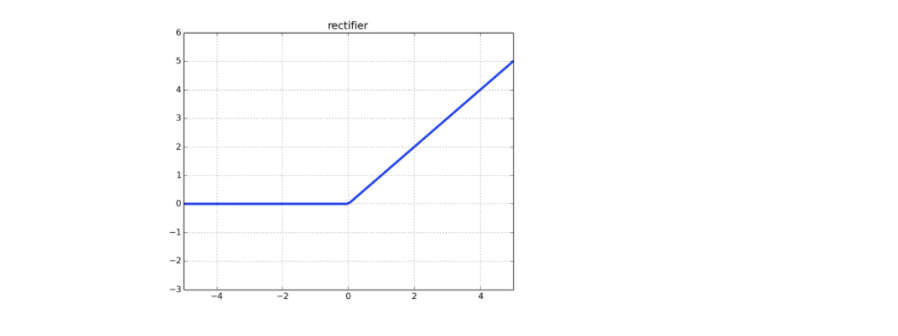

So far, we have focused on calculating slopes of the loss function with respect to weights. We also keep track of the slopes of the loss function with respect to node values, because we use those slopes in our calculations of slopes at weights. The slope of the loss function with respect to any node value is the sum of the slopes for every weight coming into that node.

### Backpropagation in Practice

Let’s see this back propagation in a deeper network. Start at the last set of weights. Those are currently 1 and 2. We multiply 3 things. The node values feeding into these weights are 1 and 3. The relevant slope for the output node is 2 times the error. That’s 6. And the slope of the activation function is 1, since the output node is positive. 
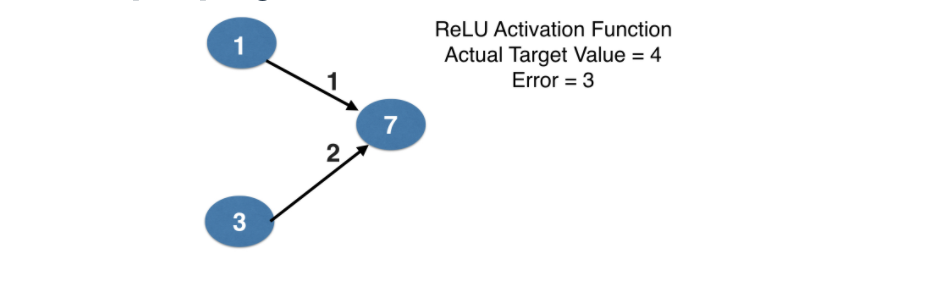

So, we have a slope for the top weight of 6, and a slope for the bottom weight of 18. Those slopes we just calculated feed into the formula associated with weights further back in the network. Let's do that calculation one layer back now. We’ve hidden the earlier and later layers, since we don’t need them to calculate the slopes for this layer of the network. This graph uses white to denotes node values, black to denote weight values, and the red shows the calculated slopes of the loss function with respect to that node, which we just finished calculating. This is all the information we need to calculate the slopes of the loss function with respect to the weights in this diagram.
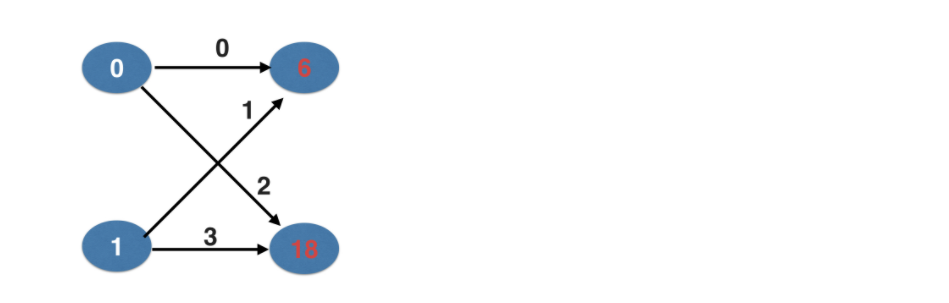

**Calculating slopes associated with any weight**
Recall, the three things we multiply to get slopes associated with any weight: value at the node feeding into the weight,the slope of the activation function for the node being fed into. That slope is 1 in all cases here. The slope of the loss function with respect to the output node. 
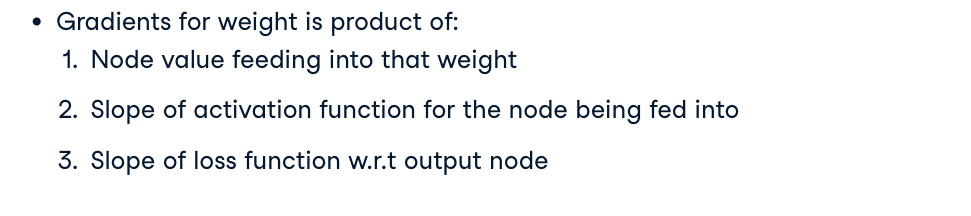

Let's start with the slopes related to the weights going into the top node. For the top weight going into the top node, we multiply 0 for the input node's value, which is in white. Times 6 for the output node's slope, which is in red. Times the derivative of the ReLU activation function. That output node has a positive value for the input, so the ReLU activation has a slope of 1. 0 times 6 times 1 is 0.For the other weight going into this node, we have 1 times 6 times the slope of the ReLU activation function at the output node's value. The slope of the activation function is still 1. So, we have 1 times 6 times 1, which is 6.Here we also show slopes associated with the other two weights. We would multiply them all by a learning rate, and use the results to update the weights in gradient descent. Pause the video and make sure you understand how these last two weights were calculated. 
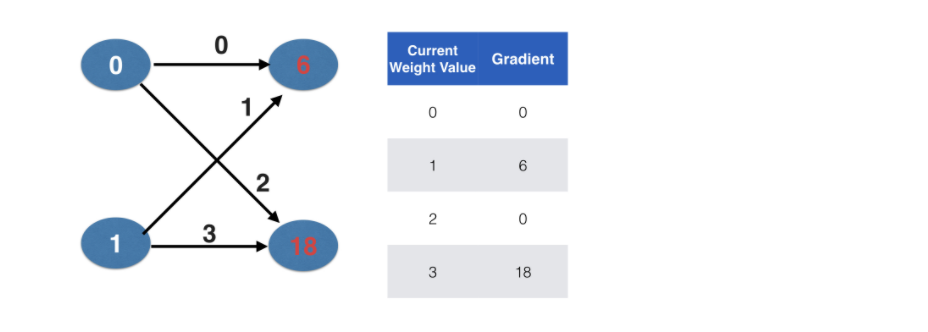

#### You are through the hardest concepts: gradient descent and back-propagation. 

**Backpropagation: Recap** As a recap, we start at some random set of weights. We then go through the following iterative process Use forward propagation to make a prediction. Use backward propagation to calculate the slope of the loss function with respect to each weight. Multiply that slope by the learning rate, and subtract that from the current weights. Keep going with that cycle until we get to a flat part. 
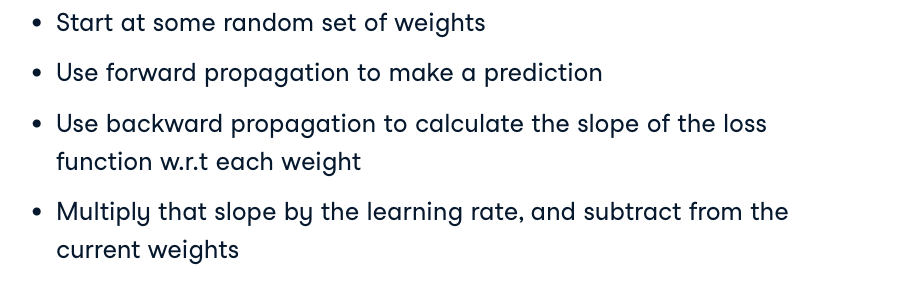

**Stochastic gradient descent**
For computational efficiency, it is common to calculate slopes on only a subset of the data, called a batch, for each update of the weights. You then use a different batch of data to calculate the next update. Once we have used all our data, we start over again at the beginning of the data. Each time through the full training data is called an epoch. So if we're going through our data for the 3rd time, we'd say we are on the 3rd epoch. When slopes are calculated on one batch at a time, rather than on the full data, that is called stochastic gradient descent, rather than gradient descent, which uses all of the data for each slope calculation. The process will be partially automated for you, but understanding the process will help fix any surprises that come up when building your models.
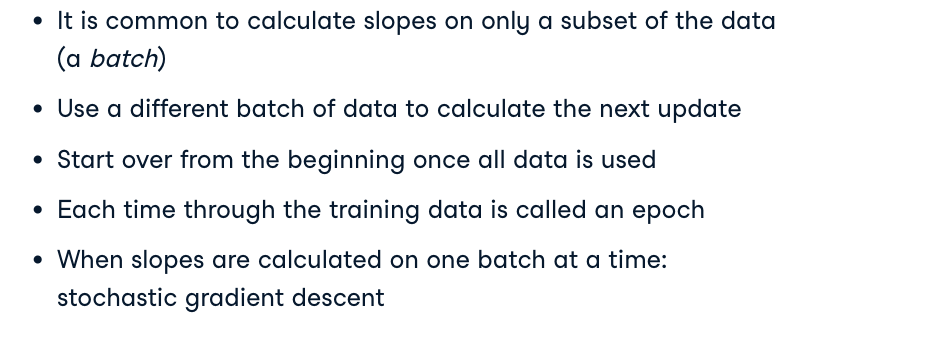

# Building deep learning models with Keras

- ### use the Keras library to build deep learning models for both regression and classification
- ### Specify-Compile-Fit workflow that you can use to make predictions
- ### all the tools necessary to build deep neural networks

### Creating a Keras Model

Learn how to create and optimize these networks using the Keras interface to the TensorFlow deep learning library.

**Model building steps.** The Keras workflow has 4 steps. First, you specify the architecture, which is things like: how many layers do you want? how many nodes in each layer? What activation function do you want to use in each layer? Next, you compile the model. This specifies the loss function, and some details about how optimization works. Then you fit the model. Which is that cycle of back-propagation and optimization of model weights with your data. And finally you will want to use your model to make predictions. We'll go through these steps sequentially. 

- Specify Architechture
- Compile
- Fit
- Predict

**Model specification.** The first step is creating or specifying your model. Here is the code to do that. This code has three blocks. 
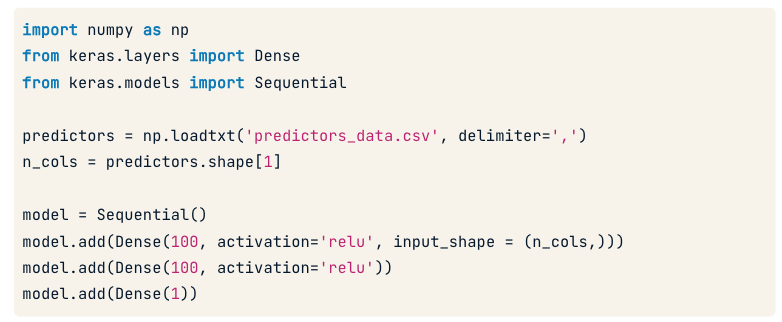

First we import what we will need. Numpy is here only for reading some data. The other two imports are used for building our model. 

The second block of two lines reads the data. We read the data here so we can find the number of nodes in the input layer. That is stored as the variable n_cols. We always need to specify how many columns are in the input when building a Keras model, because that is the number of nodes in the input layer. 

We then start building the model. The first line of model specification is model equals Sequential. There are two ways to build up a model, and we will focus on sequential, which is the easier way to build a model. Sequential models require that each layer has weights or connections only to the one layer coming directly after it in the network diagram. There are more exotic models out there with complex patterns of connections, but Sequential will do the trick for everything we need here. We start adding layers using the add method of the model. 

**Dense Layer.** The type of layer you have seen, that standard layer type, is called a Dense layer. It is called Dense because all of the nodes in the previous layer connect to all of the nodes in the current layer. As you advance in deep learning, you may start using layers that aren't Dense. 

**Building Layers.** In each layer, we specify the number of nodes as the first positional argument, and the activation function we want to use in that layer using the keyword argument activation. Keras supports every activation function you will want in practice. In the first layer, we need to specify input shapes as shown here. That says **the input will have n_cols columns, and there is nothing after the comma, meaning it can have any number of rows, that is, any number of data points**. You'll notice the last layer has 1 node. That is the output layer, and it matches those diagrams where we ended with only a single node as the output or prediction of the model. This model has 2 hidden layers, and an output layer. You may be struck that each hidden layers has 100 nodes. Keras and TensorFlow do the math for us, so don't feel afraid to use much bigger networks than we've seen before. It's quite common to use 100 or 1000s nodes in a layer. You'll learn more about choosing an appropriate number of nodes later.

### Compiling & Fitting a Model

**Why you need to compile your model**
After you've specified a model, the next task is to compile it, which sets up the network for optimization, for instance creating an internal function to do back-propagation efficiently. The compile methods has two important arguments for you to choose. The first is what optimizer to use, which controls the learning rate. In practice, the right choice of learning rate can make a big difference for how quickly our model finds good weights, and even how good a set of weights it can find. There are a few algorithms that automatically tune the learning rate. Even many experts in the field don't know all the details of all the optimization algorithms. So the pragmatic approach is to choose a versatile algorithm and use that for most problems. Adam is an excellent choice as your go-to optimizer. Adam adjusts the learning rate as it does gradient descent, to ensure reasonable values throughout the weight optimization process. The second thing you specify is the loss function. Mean squared error is the most common choice for regression problems. When we use Keras for classification, you will learn a new default metric.
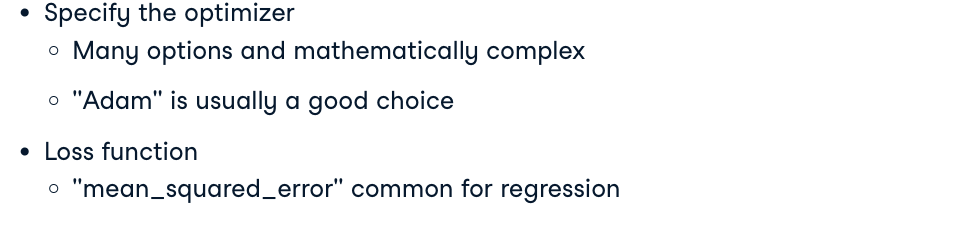

Here is an example of the code to **compile a model**. It builds a model, as you've already seen, and then we add a compile command after building the model.
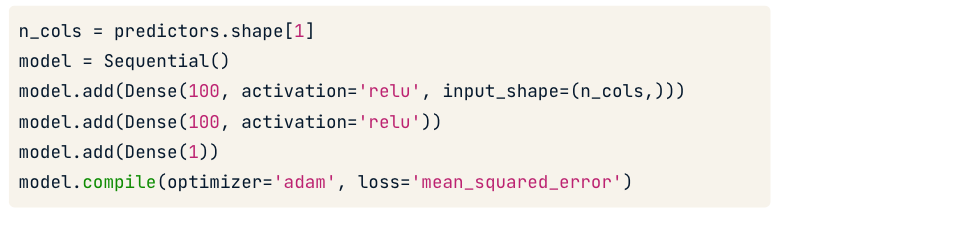

**What is fitting a model?** After compiling the model, you can **fit it**. That is **applying back-propagation and gradient descent** with your data to update the weights. The fit step looks similar to what you've seen in scikit-learn, though it has more options which we will explore soon. 

Even with the Adam optimizer, which is pretty smart, it can **improve your optimization process** if you **scale all the data** so each feature is, on average, about **similar sized values**. One common approach is to subtract each feature by that features mean, and divide it by it's standard deviation.
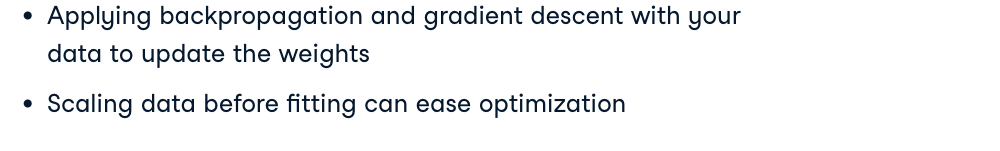

You can see what the code looks like here. After the compile step, we run fit, with the predictors as the first argument. When you run this, you will see some output showing the optimizations progress as it fits the data. We'll go into more detail about this output soon, but for now, just think of it as a log showing model performance on the training data as we update model weights.
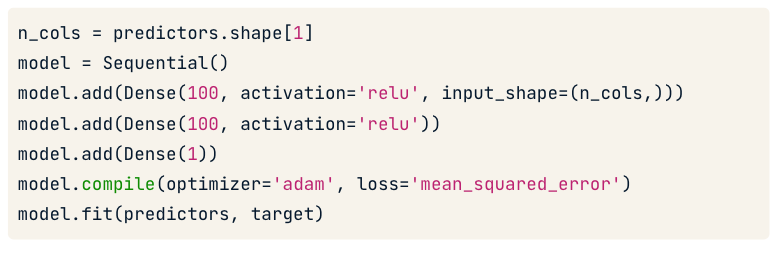

### Classification Models

So far we have focused on regression models. But deep learning works similarly for classification, that is for predicting outcomes from a set of discrete options. For classification, you do a couple of things differently. The biggest changes are:

First, **set the loss function as 'categorical_crossentropy' instead of 'mean_squared_error'**. This isn't the only possible loss function for classification problems, but it is by far the most common. You may have heard of this before under the name **LogLoss**. We won't go into the mathematics of categorical crossentropy here. For categorical crossentropy loss function, a lower score is better. But it's still hard to interpret. So I've added this argument **"metrics equals accuracy"**. This means I want to print out the accuracy score at the end of each epoch, which makes it easier to see and understand the models progress. 

Second you need to modify the last layer, so it has a separate node for each potential outcome. You will also change the activation function to softmax. The softmax activation function ensures the predictions sum to 1, so they can be interpreted like probabilities.
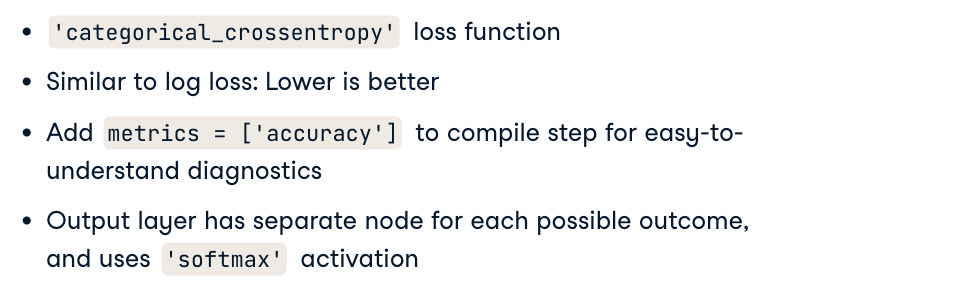

Here is some data for a binary classification problem. We have data from the NBA basketball league. It includes facts about each shot, and the shot result is either 0 or 1, indicating whether the shot went in or not. The outcome here is in a single column, which is not uncommon. 
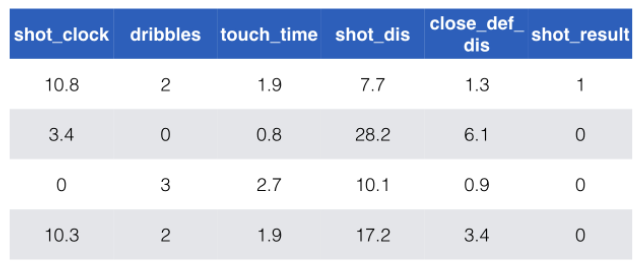

In general, we'll want to convert categoricals in Keras to a format with a separate column for each output. Keras includes a function to do that, which you will see in the code soon. This setup is consistent with the fact that your model will have a separate node in the output for each possible class. We have a new column for each value of shot_result. A 1 in any column indicates that this column corresponds to the value from the original data. This is sometimes called one-hot encoding. If the original data had 3 or 4 or 100 different values, the new array for our data would have 3 or 4 or 100 columns respectively.
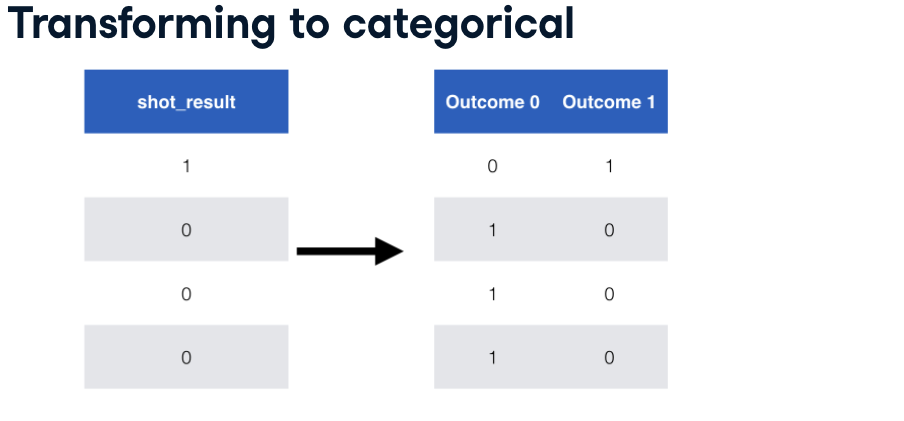

**Build the model.** Here is the code to build a model with that data. First, we import that utility function to convert the data from one column to multiple columns. That is this function to_categorical. 

We then read in the data. I like reading in the data with pandas, in case I want to inspect it. But this could be done with numpy. I also do a couple of pandas tricks here which you may or may not be familiar with. Here I use the drop command to get a version of my data without the target column. I then store that as a numpy matrix. And here, I use a dot notation to access the column with the prediction target. We keep all the data except the outcome in a matrix called predictors. We then create our target using the to_categorical function. 

Then we build our model. It looks similar to models you've seen. Except the last line of the model definition has 2 nodes, for the 2 possible outcomes. And it has the softmax activation function.
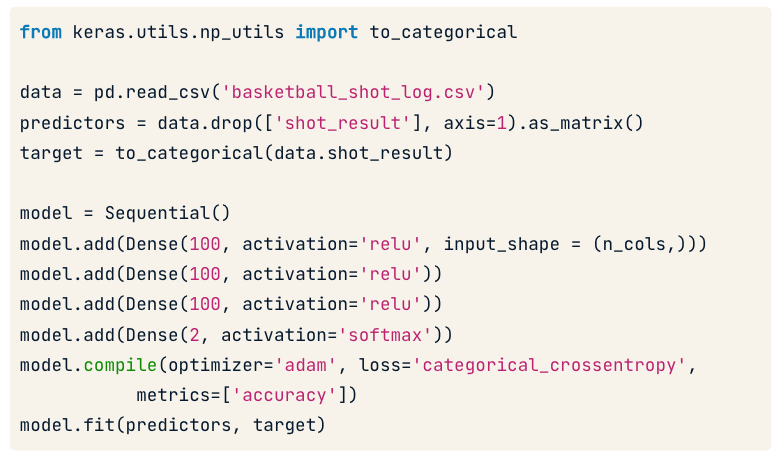


**Results.** Both accuracy and loss improve measurably for the first 3 epochs, and then the improvement slows down. Sometimes it gets a little worse for an epoch, sometimes it gets a little better. We will soon see a more sophisticated way to determine how long to train, but training for 10 epochs got us to that flat part of the loss function, so this worked well in this case. 
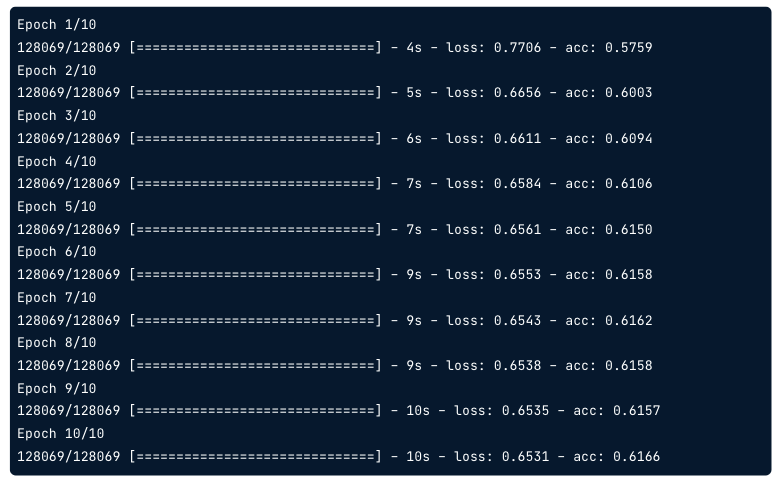

### Using Models

Now that you can build basic deep learning models, I'll show you how to use them. Then we'll go into some finer details on fine tuning model architectures. The things you'll want to do in order to use these models are: 
- save a model after you've trained it
- reload that model
- make predictions with the model

**Saving, reloading and using your Model.** Here is the code to save a model, reload it, and make predictions. 
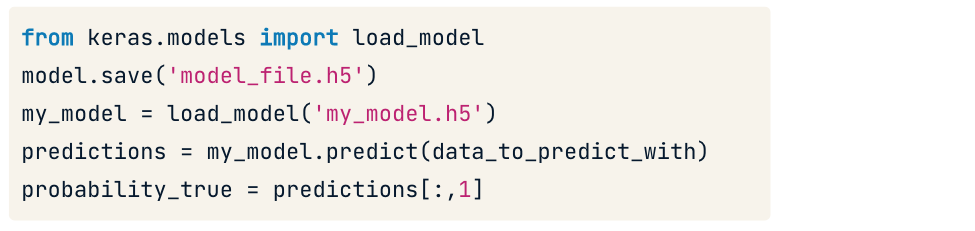

We've imported a load_model function here. Once I have a model I want to save, I can save it with the "save" method. I supply a filename. Models are saved in a format called hdf5, for which h5 is the common extension. 

I then load the model back into memory with the load_model function here. 

I then make predictions. The model I've loaded here is a classification model. The predictions come in the same format as the prediction target. You may recall that this had 1 column for whether the shot was missed, and then a 2nd column for whether the shot was made. In practice, I probably only want the probability that the shot is made. So, I'll extract that second column with numpy indexing, and I called that probability_true. 

Lastly, sometimes I'll want to verify that the model I loaded has the same structure I expect. You can print out a summary of the model architecture with the summary method. You can see the output here.
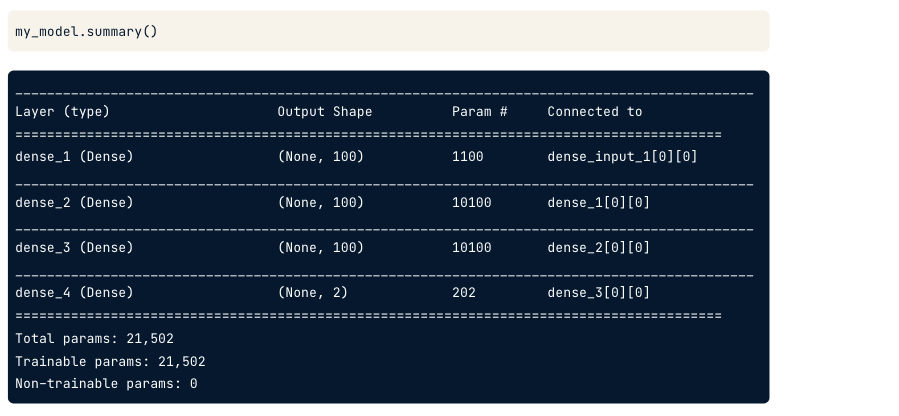

Now that you can save your model, reload it, make predictions, and verify its structure, you have most of what you need to not just build models, but to work with them in practical situations.

# Fine tuning Keras models
- ### optimize your deep learning models in Keras
- ### validate your models
- ### model capacity
- ### experiment with wider and deeper networks

### Understanding Model Optimization

At this point, you have a good understanding of how neural networks work, and how to build them in Keras. But you probably don't yet have a great intuition for how to choose things like model architecture and model optimization arguments. You'll learn that in this last chapter.

**Why optimization is hard.** In practice, optimization is a hard problem. The optimal value for any one weight depends on the values of the other weights, and we are optimizing many weights at once. Even if the slope tells us which weights to increase, and which to decrease, our updates may not improve our model meaningfully. A small learning rate might cause us to make such small updates to the model's weights that our model doesn't improve materially. A very large learning rate might take us too far in the direction that seemed good. A smart optimizer like Adam helps, but optimization problems can still occur. 

The easiest way to see the effect of different learning rates is to use the simplest optimizer,**Stochastic Gradient Descent**, sometimes abbreviated to SGD. This optimizer uses a fixed learning rate. Learning rates around point-01 are common. But you can specify the learning rate you need with lr argument as shown here. 
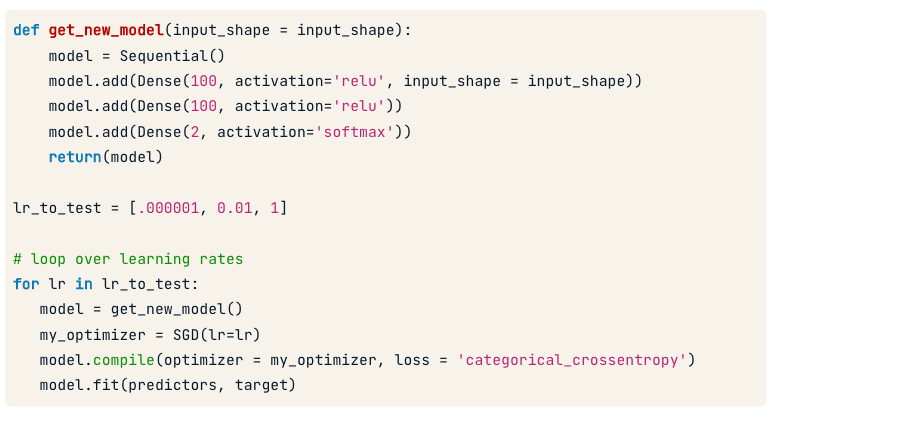

We have a function that creates a new model here. We create models in a for loop, and each time around we compile the model using SGD with a different learning rate. We pass in the optimizer with the same argument where we previously passed the string for "Adam". 

Even if your learning rate is well tuned, you can run into the so-called **"dying-neuron" problem**. This problem occurs when a neuron takes a value less than 0 for all rows of your data. Recall that, with the ReLU activation function, any node with a negative input value produces an output of 0, and it also has a slope of 0 as you see in this graph. 
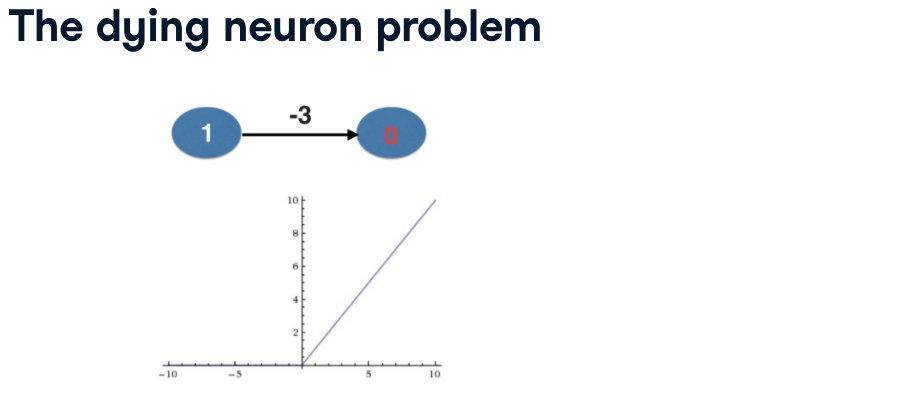

Because the slope is 0, the slope of any weights flowing into that node are also 0. So those weights don't get updated. In other words, once the node starts always getting negative inputs, it may continue only getting negative inputs. It's contributing nothing to the model at this point, and hence the claim that the node or neuron is "dead."At first, this might suggest using an activation function whose slope is never exactly zero. However, those types of functions were used for many years.

**Vanishing gradients** For example, in an earlier video we used an s-shaped function called tanh. However, values that were outside the middle of the S were relatively flat, or had small slopes.
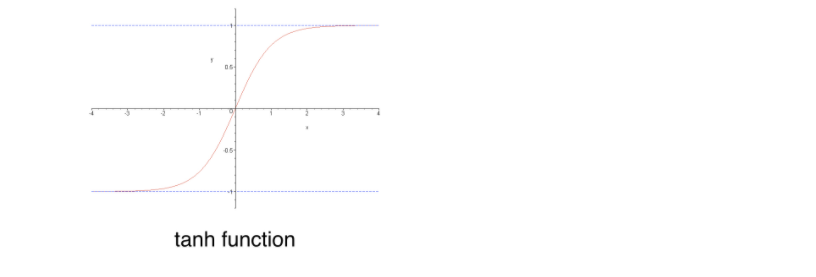

A small but non-zero slope might work in a network with only a few hidden layers. But in a deep network, one with many layers, the repeated multiplication of small slopes causes the slopes to get close to 0, which meant updates in backprop were close to 0. This is called the **vanishing gradient problem**. 

This in turn might suggest using an activation function that isn't even close to flat anywhere. There is research in this area, including variations on ReLU. Those aren't widely used though. For now, it's a phenomenon worth keeping in mind if you are ever pondering why your model isn't training better. If it happens, changing the activation function may be the solution.


### Model Validation in Deep Learning

You may recall from previous machine learning classes that your model's performance on the training data is not a good indication of how it will perform on new data. For this reason, we use validation data to test model performance. Validation data is data that is explicitly held out from training, and used only to test model performance.

**K-Fold Cross Validation** You may already be familiar with k-fold cross validation. In practice, few people run k-fold cross validation on deep learning models because deep learning is typically used on large datasets. So the computational expense of running k-fold validation would be large, and we usually trust a score from a single validation run because those validation runs are reasonably large. 

Keras makes it easy to use some of your data as validation data, and we see that in this code, where we specify the split using the keyword argument validation_split when calling the fit method. 
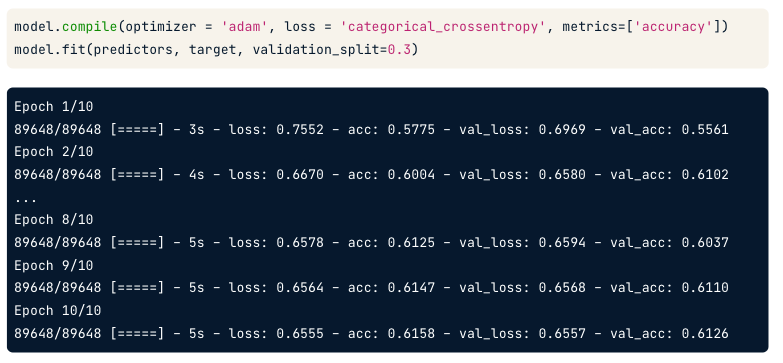

Here, we have already specified a model, and we'll make **small changes in both the compile and fit steps to see model validation information**. This is a classification problem, and we'd like to see measures of accuracy. So, we include metrics equals 'accuracy' in the compile step. In the fit step, we specify what fraction of the data is used for validation. In this case, we'll use 30%. 


**Early Stopping.** Our goal is to have the best validation score possible, so we should **keep training while validation score is improving, and then stop training when the validation score isn't improving**. We do this with something called **"early stopping."** We can use early stopping with only some small changes to the code. See here, we've imported something called EarlyStopping. 
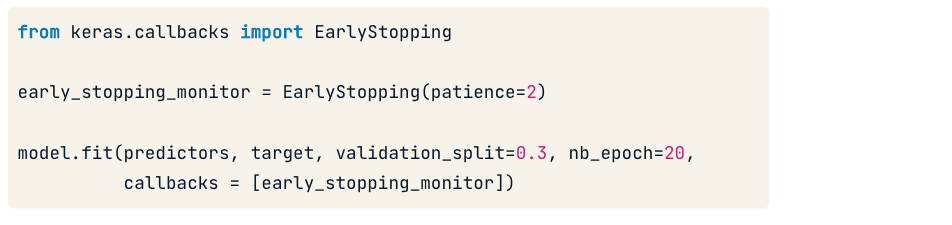

We then create an "early stopping monitor" before fitting the model. That monitor takes an argument called patience, which is how many epochs the model can go without improving before we stop training. 2 or 3 are reasonable values for patience. Sometimes you'll get a single epoch with no improvement, but the model will start improving again after that epoch. But if you see 3 epochs with no improvement, it's unlikely to turn around and start improving again. 

We pass early_stopping_monitor to the fit function under an argument called callbacks. Notice that callbacks takes a list. You may consider adding other callbacks as you become very advanced. But early stopping is all you want for now. 

By default, keras trains for 10 epochs. Now that we have smart logic for determining when to stop, we can set a high maximum number of epochs. This happens with the nb_epoch argument, as you see here. Keras will go until this number of epochs, unless the validation loss stops improving, in which case it will stop earlier. This is smarter training logic than relying on a fixed number of epochs without looking at the validation scores.

**Output from early stopping.** Let's look at the output. In epoch 9 we had a validation loss score of point-6513. We didn't beat that score in the next 2 epochs, so we stopped training. Now that you have a reliable way of measuring model performance, namely through scores, you should feel free to experiment with different architectures.
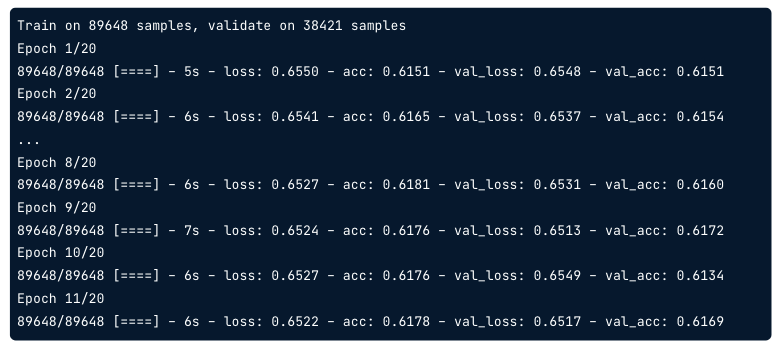

**Experimentation.** More layers, fewer layers. Layers with more nodes, layers with fewer nodes. And so on. Creating a great model requires some experimentation. 

Before we finish, we'll give a little bit of insight into how to choose where you experiment. But, now that you can get validation scores, you are poised to run those experiments and figure out what works best for your data.

### Thinking About Model Capacity

At this point, you know how to run experiments, and compare different models performance. However, it takes some practice to **get an intuition for what experiments or architectures to try. There is still a little more art to finding good deep learning architectures than there is for tuning other machine learning algorithms**. But something called "model capacity" should be one of the key considerations you think about when deciding what models to try."Model capacity" or "network capacity" is closely related to the terms overfitting and underfitting.

**Overfitting.** You may recall overfitting and a graphic like this from a previous DataCamp course. Overfitting is the ability of a model to fit oddities in your training data that are there purely due to happenstance, and that won't apply in a new dataset. 
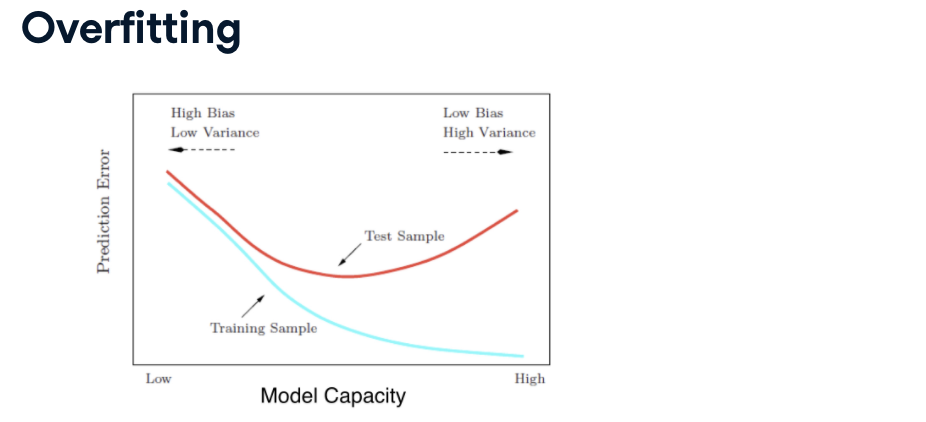

When you are overfitting, your model will make accurate predictions on training data, but it will make inaccurate predictions on validation data and new datasets. Underfitting is the opposite. That is when your model fails to find important predictive patterns in the training data. So it is accurate in neither the training data nor validation data. Because we want to do well on new datasets that weren't used for training the model, our **validation score is the ultimate measure of a model's predictive quality**. Let's get back to model capacity. **Model capacity is a model's ability to capture predictive patterns in your data**. So, the more capacity a model, the further to the right we will be on this graph. If you had a network, and you increased the number of nodes or neurons in a hidden layer, that would increase model capacity. And if you add layers, that increases capacity. Said another way, making larger layers or increasing the number of layers moves you further to the right of this graph. 

**Workflow for optimizing model capacity.** So, with that in mind, here is a good workflow for you. Start with a simple network, and get the validation score. Then keep adding capacity as long as the score keeps improving. Once it stops improving, you can decrease capacity slightly, but you are probably near the ideal.

**Example.** Let's walk through that process once. Here, I've started a model that has one hidden layer and 100 units. That's a relatively simple, or low capacity, model. I get a mean squared error of 5-point-4. 
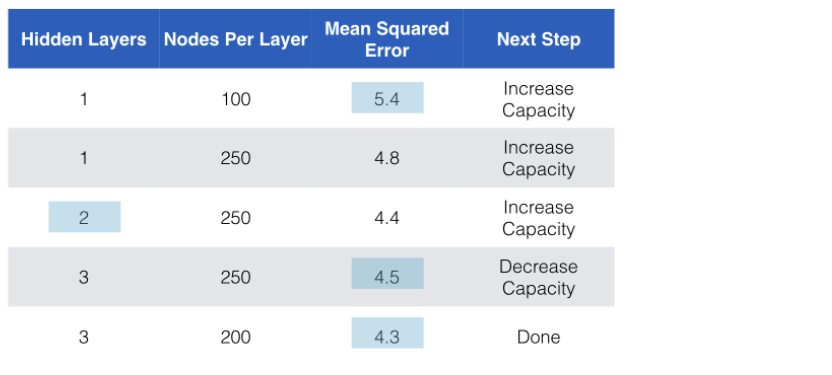

Since I started with a simple model, I now try increasing capacity. I could increase the number of layers or use more hidden nodes. I'll start by using more nodes in the one hidden layer. That improved the model, so I'll keep increasing capacity.

This time I'll switch to using 2 hidden layers. Each layer has 250 nodes. That improved the error more. 

So, I try 3 layers, continuing to add capacity as long as it helps. This hurt the score. So, the model with 2 layers and 250 nodes is about perfect. 

I'll try another model that reduces capacity slightly from the last model I built. That is 3 hidden layers with 200 nodes each. That seems the best model yet. So I'll stick with that. 

Should you change capacity by adding layers or by adding nodes to an existing layer? There isn't a universal answer to that. You can experiment. But you should generally be thinking about whether you are trying to increase or decrease capacity, ideally honing in on the right capacity by looking at validation scores.

### Final Thoughts

Congrats. You are on your way to using the most fun and powerful modeling technique around.

**Next steps.** There is still an immense amount to learn as you become a deep learning master. But it's like riding a bike. The hardest part is getting to the point where you can practice on your own, and you are there. 

You'll probably enjoy experimenting with deep learning using the same types of data you've used before for predictive modeling, tables of numeric data like what you commonly see in a pandas DataFrame or numpy array. From there, many people start working with images, using something called convolutional neural networks. But you could decide you want to focus on text. Or sound. Or you might get creative and apply deep learning to data others haven't even thought of. 

You'll find it's a powerful technique as you get the hang of it. Kaggle is a great place to find datasets to work with, and their forums are a great place to keep learning. 

As you get more advanced, start checking out the wikipedia page titled "List of datasets for machine learning research." It includes datasets from some very interesting domains. Keras has excellent documentation. When there's something specific to look up, keras.io is likely to have the answer. The Keras and TensorFlow repositories on GitHub also have nice examples to work from. 

As you start working with larger datasets and more complex deep learning models, you may find these models can take a long time to fit. If you have a computer with a graphical processing unit, or GPU, you may be able to set up TensorFlow to use that GPU for computation. This generally requires a GPU that meets a standard called CUDA compatibility. Most GPU's made by NVIDIA are CUDA compatible. If you don't have a computer with a CUDA compatible GPU, here is a link with instructions about setting up a deep learning environment in the cloud that can run your models on a GPU. More than anything, share your work online, and have fun. 

https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws

If you keep experimenting and build out on the tools you've learned, you'll soon be amazed at what you can do.

## Sources

Becker, Dan (2022). Introduction to Deep Learning in Python, Datacamp. Available from https://app.datacamp.com/learn/courses/introduction-to-deep-learning-in-python![image.png](attachment:image.png)